In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

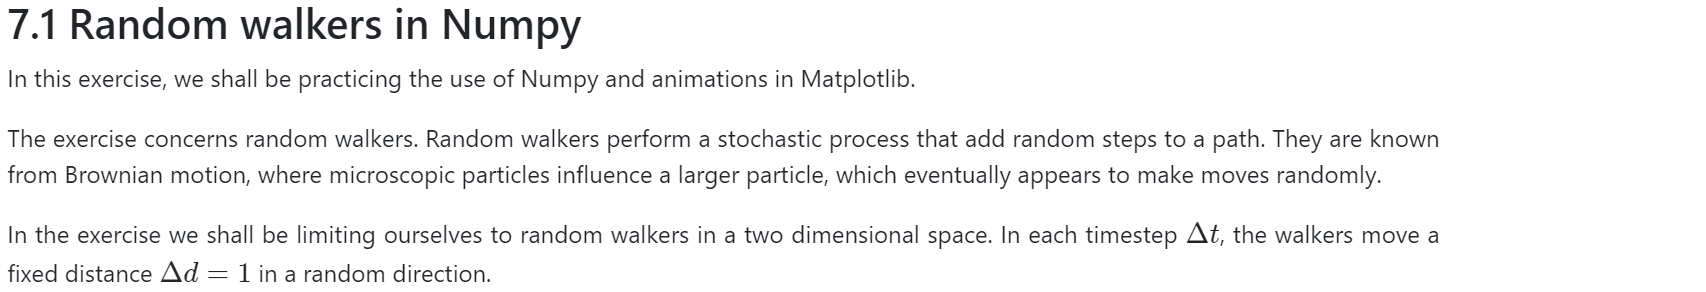

In [2]:
Deltad = 1

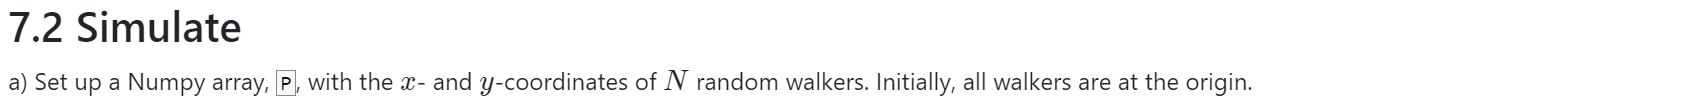

In [3]:
N = 100
# Nx2 array of zeros
P = np.zeros((N,2))

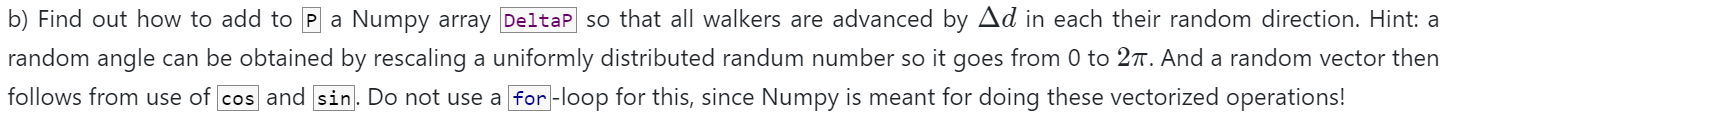

In [4]:
DeltaP = np.zeros((N,2))
theta = 2*np.pi*np.random.rand(N)
DeltaP[:,0] = Deltad*np.cos(theta)
DeltaP[:,1] = Deltad*np.sin(theta)

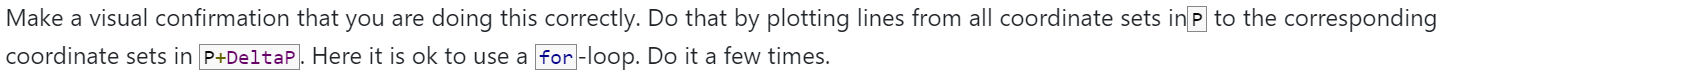

Text(0, 0.5, '$y$')

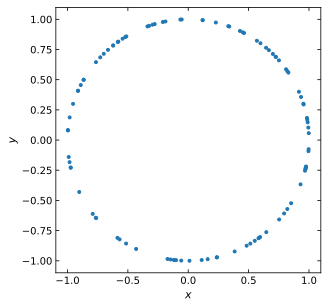

In [5]:
fig, ax = plt.subplots()
ax.plot((P+DeltaP)[:,0]-P[:,0], (P+DeltaP)[:,1]-P[:,1], '.')
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

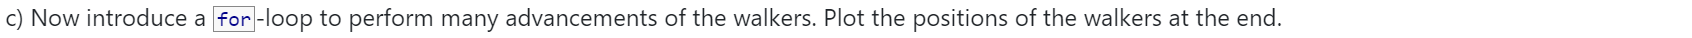

Text(0, 0.5, '$y$')

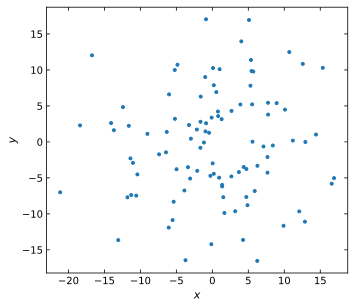

In [6]:
# Many advancements
Nsteps = 100
DeltaP = np.zeros((N,2))
for i in range(Nsteps):
    theta = 2*np.pi*np.random.rand(N)
    DeltaP[:,0] += Deltad*np.cos(theta)
    DeltaP[:,1] += Deltad*np.sin(theta)

# Plot
fig, ax = plt.subplots()
ax.plot(DeltaP[:,0], DeltaP[:,1], '.')
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

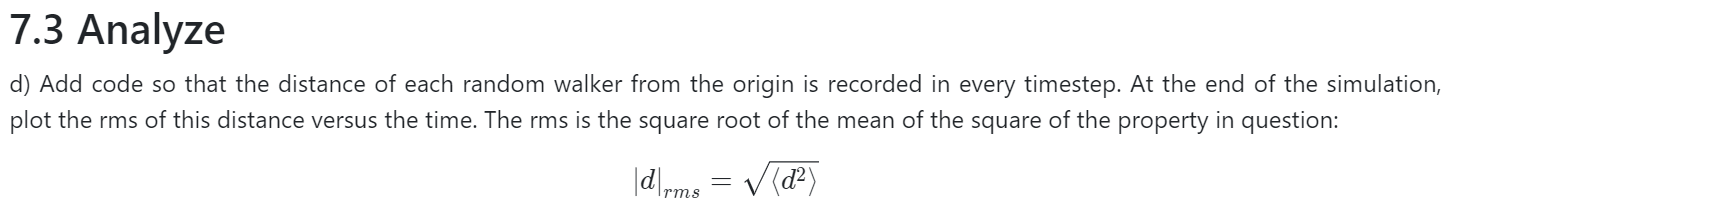

Text(0, 0.5, '$\\log_{10}(|d|_\\mathrm{RMS})$')

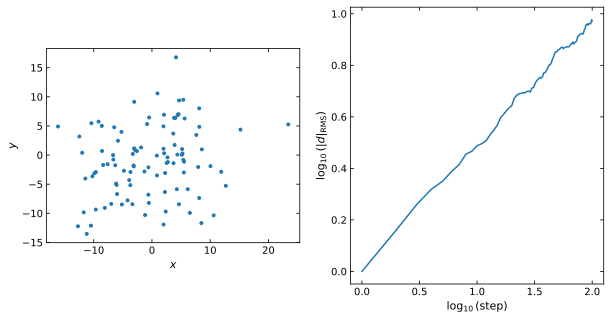

In [7]:
# Many advancements with RMS distance calculated along the way
Nsteps = 100
DeltaP = np.zeros((N,2))
RMS = np.zeros(Nsteps)
for i in range(Nsteps):
    theta = 2*np.pi*np.random.rand(N)
    DeltaP[:,0] += Deltad*np.cos(theta)
    DeltaP[:,1] += Deltad*np.sin(theta)
    RMS[i] = np.sqrt(np.mean(DeltaP[:,0]**2 + DeltaP[:,1]**2))

# Plot final position of walkers and log10(RMS) vs log10(step)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(DeltaP[:,0], DeltaP[:,1], '.')
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')

ax[1].plot(np.log10(np.arange(1,Nsteps+1)), np.log10(RMS), '-')
ax[1].set_xlabel(r'$\log_{10}(\mathrm{step})$')
ax[1].set_ylabel(r'$\log_{10}(|d|_\mathrm{RMS})$')

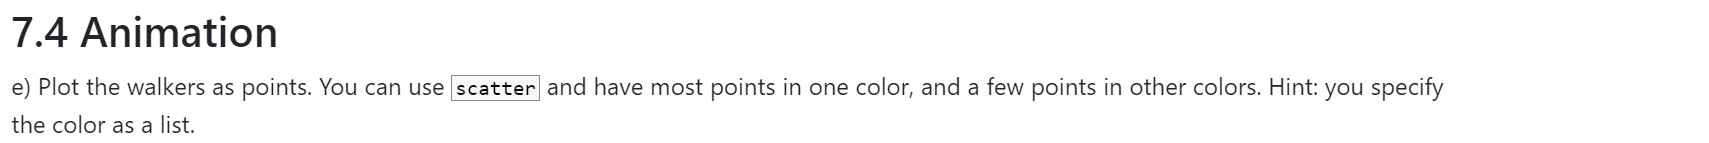

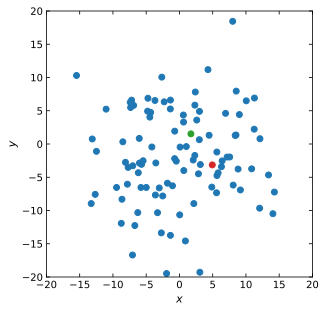

In [8]:
P_list = [np.zeros((N,2))]
DeltaP = np.zeros((N,2))
for i in range(Nsteps):
    theta = 2*np.pi*np.random.rand(N)
    DeltaP[:,0] += Deltad*np.cos(theta)
    DeltaP[:,1] += Deltad*np.sin(theta)
    P_list.append(DeltaP.copy())

fig, ax = plt.subplots()
clist = ['tab:blue']*N
clist[-1] = 'tab:red'
clist[-2] = 'tab:green'

scat = ax.scatter(P_list[0][:,0], P_list[0][:,1], c=clist)
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

def update(i):
    scat.set_offsets(P_list[i])
    return [scat]

anim = animation.FuncAnimation(fig,
                               update,
                               frames=N,
                               interval=100,
                               blit=True)
anim